# Classification

In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('ex2data1.csv', names='x1 x2 y'.split())

In [34]:
df

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Data cleaning

In [35]:
x1 = df.x1
x2 = df.x2

In [36]:
x1 = x1.to_numpy()
x2 = x2.to_numpy()

In [37]:
x = df.iloc[:, 0:2]

In [38]:
ones = np.ones((len(df), 1))

In [39]:
x.insert(0, "x0", ones)
x

,x0,x1,x2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376
...,...,...,...
95,1.0,83.489163,48.380286
96,1.0,42.261701,87.103851
97,1.0,99.315009,68.775409
98,1.0,55.340018,64.931938


In [40]:
x  = x.to_numpy()

In [41]:
y = df.y.to_numpy()
y = y.reshape((100, 1))

In [42]:
initial_theta = np.zeros((x.shape[1], 1))

In [43]:
initial_theta

array([[0.],
       [0.],
       [0.]])

In [44]:
x.shape

(100, 3)

In [45]:
y.shape

(100, 1)

## Plot data

In [46]:
import matplotlib.pyplot as plt

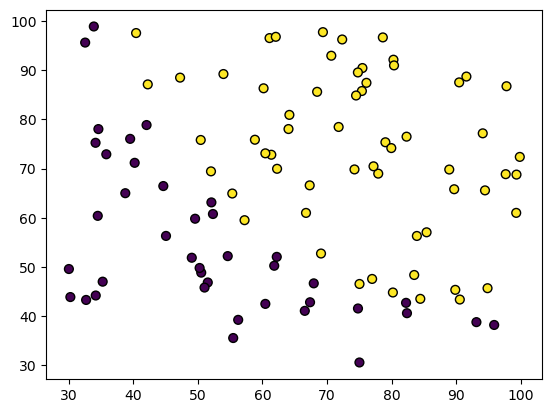

In [146]:
plt.scatter(x[:, 1], x[:, 2], marker="o", c=y, s=40, edgecolor="k")

## Hypothesis

In [48]:
#1/(1 + e^-z) where z is theta * x 
import math

In [49]:
def hypothesis(theta, x):
    hyp = np.matmul(x, theta)
    return 1/(1 + np.exp(-hyp))

## Cost Function

In [50]:
def cost(theta, x, y, total_examples):
    hyp = hypothesis(theta, x)
    res_cost = (-1/total_examples) * sum((y - np.log(hyp)) + ((1- y)* np.log(1- hyp)))
    return res_cost

In [51]:
cost(initial_theta, x, y, len(x))

array([-1.01588831])

In [52]:
initial_theta.shape

(3, 1)

In [53]:
x.shape

(100, 3)

## Gradient Descent

In [123]:
def gradient(x_values, y, m, theta, alpha, iterations):
    cost_history = []
    while True:
        prev_cost = cost(theta, x_values, y, m) 
        hyp = hypothesis(theta, x_values)
        theta -= (alpha/m) * (np.matmul(np.transpose(x_values), hyp-y))
        new_cost = cost(theta, x_values, y, m)
        cost_history.append(new_cost)
        if round(prev_cost[0], 8) == round(new_cost[0], 8):
            return theta, cost_history

In [124]:
theta, cost_history = gradient(x, y, len(x), initial_theta, 0.001, 100)

In [125]:
len(cost_history)

6309235

In [135]:
theta

array([[-24.58228967],
       [  0.20160041],
       [  0.19678601]])

In [136]:
hyp_arr = hypothesis(theta, x[:, :])

In [137]:
hyp_arr


array([[9.55240364e-02],
       [5.33515048e-05],
       [4.70072790e-02],
       [9.89385494e-01],
       [9.97928609e-01],
       [1.19948744e-02],
       [9.98805625e-01],
       [4.26513155e-01],
       [9.99651806e-01],
       [7.32268777e-01],
       [9.05991004e-01],
       [3.11525379e-02],
       [9.99143181e-01],
       [9.99821601e-01],
       [1.61330211e-01],
       [9.79225891e-01],
       [4.30666135e-01],
       [1.54663165e-01],
       [9.99647413e-01],
       [5.74185470e-01],
       [7.10906002e-02],
       [9.98414042e-01],
       [8.32348820e-03],
       [1.25220706e-04],
       [9.90987009e-01],
       [8.50385874e-01],
       [5.99733064e-01],
       [8.61169574e-01],
       [9.72995879e-02],
       [1.84727136e-02],
       [8.92771992e-01],
       [9.79413705e-01],
       [1.60479253e-01],
       [3.94962561e-01],
       [7.82981128e-02],
       [3.58166761e-02],
       [8.46993252e-01],
       [9.86311172e-01],
       [2.10206812e-01],
       [5.28938978e-02],


In [138]:
hyp_arr[hyp_arr >= 0.5] = 1
hyp_arr[hyp_arr < 0.5] = 0

In [139]:
hyp_arr

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [140]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

## Model accuracy

In [141]:
# Mean squared error mathematically calculating the accuracy of model by comparing actual outputs vs predicted ones

mse = (1/(len(x))) * sum((y - hyp_arr)** 2)
mse

array([0.11])

In [142]:
model_accuracy = f'{1 - mse[0]:.1%}'

In [143]:
model_accuracy

'89.0%'

In [144]:
len(hyp_arr[hyp_arr != y])

11

## Plot hypothesis line

In [189]:
theta

array([[-24.58228967],
       [  0.20160041],
       [  0.19678601]])

In [196]:
x1 = x[:, 1:]
x2 = (-theta[0] - ( theta[1]* x1)) / theta[2]

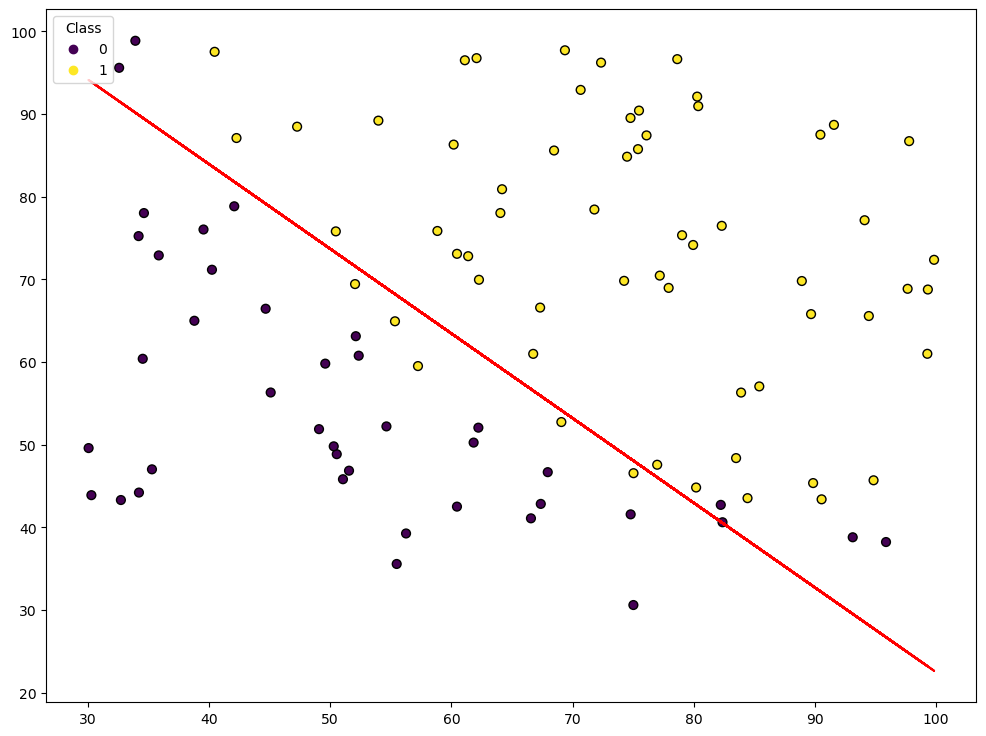

In [197]:
# Plotting the decision boundary
plt.figure(figsize=(12,9))
scatter = plt.scatter(x[:, 1], x[:, 2], marker="o", c=y, s=40, edgecolor="k")
plt.legend(*scatter.legend_elements(),
           loc = 'upper left',
           title = 'Class')
plt.plot(x1, x2, color='red', label='Decision Boundary')
plt.show()